In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math 
import time 

In [ ]:
def create_graph():
  G= nx.Graph()
  G.add_nodes_from(range(1,101))
  return G

In [ ]:
def visualize(G, t):
  time.sleep(1)
  labeldict= get_labels(G)
  nodesize= get_size(G)
  color= get_colors(G)
  nx.draw(G,labels= labeldict, node_size= nodesize, node_color= color)
  plt.savefig('evolution.jpg')
  plt.clf()
  plt.cla()
  nx.write_gml(G, 'evolution_'+str(t)+ '.gml')


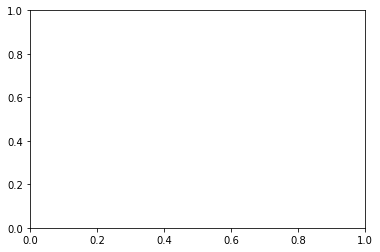

In [ ]:
G= create_graph()
assign_bmi(G)
add_foci_nodes(G)
add_foci_edges()
time.sleep(10)
t= 0
visualize(G, t)
#nx.write_gml(G, 'evolution_0.gml')
for t in range(0,10):
  homophily(G)
  #visualize(G)
  closure(G)
  visualize(G, t+1)                                      

In [ ]:
def assign_bmi(G):
  for each in G.nodes():
    G.nodes[each]['name']= random.randint(15,40)
    G.nodes[each]['type']= 'person'

In [ ]:
def get_labels(G):
  dict1= {}
  for each in G.nodes():
    dict1[each]= G.nodes[each]['name']
  return dict1

In [ ]:
def get_size(G):
  array1= []
  for each in G.nodes():
    if G.nodes[each]['type']== 'person':
      array1.append(G.nodes[each]['name']* 20)
    else:
      array1.append(1000)
  return array1                           

In [ ]:
def add_foci_nodes(G):
  n= G.number_of_nodes()
  i= n+1
  foci_nodes= ['gym','eatout','movie_club','yoga_club','karate_club']
  for j in range(0,5):
    G.add_node(i)
    G.nodes[i]['name']= foci_nodes[j]
    G.nodes[i]['type']= 'foci'
    i= i+1
    
    

In [ ]:
def get_colors(G):
  c= []
  for each in G.nodes():
    if G.nodes[each]['type']== 'person':
      if G.nodes[each]['name']== 15:
        c.append('green')
      elif G.nodes[each]['name']== 40:
        c.append('yellow')
      else:
        c.append('blue')
    else:
      c.append('red')
  return c

In [ ]:
def get_foci_nodes():
  f= []
  for each in G.nodes():
    if G.nodes[each]['type']== 'foci':
      f.append(each)
  return f

In [ ]:
def get_persons_nodes():
  p= []
  for each in G.nodes():
    if G.nodes[each]['type']== 'person':
      p.append(each)
  return p

In [ ]:
def add_foci_edges():
  foci_nodes= get_foci_nodes()
  person_nodes= get_persons_nodes()
  for each in person_nodes:
    r= random.choice(foci_nodes)
    G.add_edge(each, r)

In [ ]:
def homophily(G):
  pnodes= get_persons_nodes()
  for u in pnodes:
    for v in pnodes:
      if u!=v:
        diff= abs(G.nodes[u]['name']- G.nodes[v]['name'])
        p= float(1)/(diff+1000)
        r= random.uniform(0,1)
        if r<p:
          G.add_edge(u,v)                     

In [ ]:
def cmn(u,v,G):
  nu= set(G.neighbors(u))
  nv= set(G.neighbors(v))
  return len(nu & nv)

In [ ]:
def closure(G):
  array1= []
  for u in G.nodes():
    for v in G.nodes():
      if u!=v and (G.nodes[u]['type']== 'person' or G.nodes[v]['type']== 'person'):
        K= cmn(u,v,G)
        p= 1-math.pow((1-0.01),K)
        tmp= []
        tmp.append(u)
        tmp.append(v)
        tmp.append(p)
        array1.append(tmp)
  for each in array1:
    u= each[0]
    v= each[1]
    p= each[2]
    r= random.uniform(0,1)
    if r<p:
      G.add_edge(u,v)

ANALYZE THE WORK

In [ ]:
def plot_density():
  x= []
  y= []
  for i in range(0,11):
    G= nx.read_gml('evolution_'+str(i)+'.gml')
    x.append(i)
    y.append(nx.density(G))
  plt.xlabel('Time')
  plt.ylabel('Density')
  plt.title('Change in Density')
  plt.plot(x,y)
  plt.show()

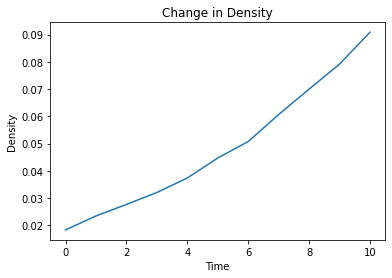

In [ ]:
plot_density()

In [ ]:
def obesity(G):
  num= 0
  for each in G.nodes():
    if G.nodes[each]['name']== 40:                                        
      num= num+1
  return num

In [ ]:
def plot_obesity():
  x= []
  y= []
  for i in range(0,11):
    G= nx.read_gml('evolution_'+str(i)+'.gml')
    x.append(i)
    y.append(obesity(G))
  plt.xlabel('Time')
  plt.ylabel('Obesity')
  plt.title('Change in Obesity')
  plt.plot(x,y)
  plt.show()

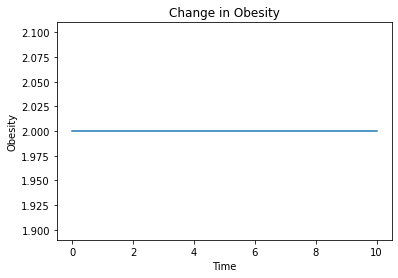

In [ ]:
plot_obesity()